In [125]:
import pandas as pd, numpy as np,  matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [45]:
df = pd.DataFrame(load_breast_cancer()['data'], columns=load_breast_cancer()['feature_names'])
df['label'] = load_breast_cancer()['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [47]:
X = df.drop('label', axis=1)
y = df.label
X_train,X_test, y_train,y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [121]:
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)

pred_prob = [i[1] for i in lg.predict_proba(X_train)]
pred_prob

[1.2100235321147608e-16,
 0.17654929895121374,
 0.9859916571977094,
 0.9679680798275206,
 0.9718458458052608,
 0.8077406780297052,
 0.9206969717803101,
 0.9998251666624165,
 0.9916228209137296,
 0.9961733621862304,
 0.9320931973289118,
 0.9961705227245398,
 0.9992364795947263,
 0.9708650736010365,
 0.04102367789639628,
 0.9954016205423171,
 0.9930667807900433,
 0.525975447497714,
 0.4086438012616412,
 0.9994728865707387,
 1.6229571329881792e-06,
 0.9967162063685635,
 0.9777760850571885,
 0.9965967406517274,
 0.013140978652404519,
 9.14544038784306e-08,
 0.9986536668064318,
 0.9904272111257891,
 0.9996817162138926,
 0.9906345400452568,
 0.09460284851794187,
 0.9828093091683254,
 0.9985198808776797,
 0.0004400704009815979,
 3.018407444561619e-08,
 0.9675567949937978,
 5.417148698151992e-07,
 6.219997237940289e-11,
 0.037858727986495255,
 0.9737990332546318,
 0.9685489312099855,
 0.9996563986516193,
 4.560648810939835e-09,
 0.9985378099823164,
 0.875416183811506,
 2.4920872198841323e-06,


In [131]:
sort = lambda x: 1 if x>0.5 else 0
train_pred = [sort(i) for i in pred_prob]

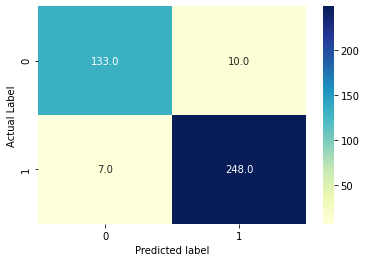

In [145]:
conf = metrics.confusion_matrix(y_train, train_pred)
sns.heatmap(conf, cmap='YlGnBu', annot=True, fmt='.1f')
plt.xlabel('Predicted label')
plt.ylabel('Actual Label')
plt.show()

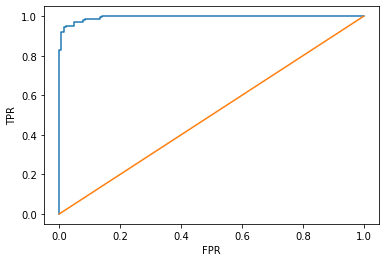

AUC score = 0.99


In [66]:
FPR,TPR,thresh = metrics.roc_curve(y_train, pred_prob)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print('AUC score =', round(metrics.roc_auc_score(y_train, pred_prob),2))

In [154]:
metr = pd.DataFrame({'Actual':y_train,'pred_prob':pred_prob})
curve = pd.DataFrame(columns=['Sensitivity','Specificity','Accuracy'])

for i in np.linspace(0.1,0.9,10):
    metr['predicted'] = metr.pred_prob.map(lambda x: 1 if x>i else 0)
    conf = metrics.confusion_matrix(metr.Actual, metr.predicted)
    sensitivity = metrics.recall_score(metr.Actual, metr.predicted)
    specificity = conf[0,0]/sum(conf[0])
    accuracy = metrics.accuracy_score(metr.Actual, metr.predicted)
    curve.loc[i] = [sensitivity, specificity, accuracy]
    
curve.index.rename('Threshold', inplace=True) 
curve

,Sensitivity,Specificity,Accuracy
Threshold,,,
0.100000,1.000000,0.818182,0.934673
0.188889,0.996078,0.867133,0.949749
0.277778,0.988235,0.888112,0.952261
0.366667,0.984314,0.909091,0.957286
0.455556,0.972549,0.930070,0.957286
0.544444,0.968627,0.944056,0.959799
0.633333,0.964706,0.951049,0.959799
0.722222,0.960784,0.951049,0.957286
0.811111,0.949020,0.979021,0.959799


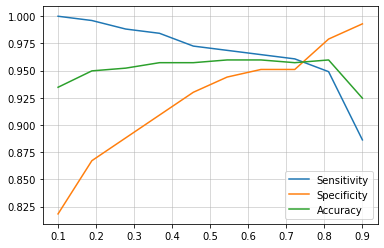

In [155]:
plt.plot(curve.index,curve.Sensitivity, label='Sensitivity')
plt.plot(curve.index,curve.Specificity, label='Specificity')
plt.plot(curve.index,curve.Accuracy, label='Accuracy')
plt.grid(alpha=0.6)
plt.legend()
plt.show()

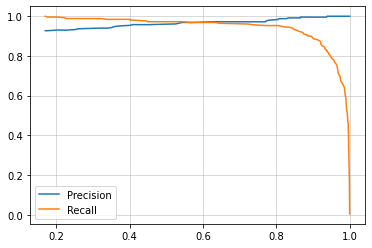

In [156]:
precision,recall,threshold = metrics.precision_recall_curve(y_train, pred_prob)
plt.plot(threshold, precision[:-1], label='Precision')
plt.plot(threshold, recall[:-1], label='Recall')
plt.grid(alpha=0.6)
plt.legend()
plt.show()

In [158]:
test_pred_proba = [i[1] for i in lg.predict_proba(X_test)]

sort = lambda x: 1 if x>=0.6 else 0
test_pred = [sort(i) for i in X_test_pred]

conf = metrics.confusion_matrix(y_test, test_pred)

print('Accuracy =',round(metrics.accuracy_score(y_test, test_pred),2))
print('Sensitivity/Recall =',round(metrics.recall_score(y_test, test_pred),2))

Accuracy = 0.96
Sensitivity/Recall = 0.96
